In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

data = {
    "Area_sqft":[600,800,1000,1200,1400,1600,2000,2200],
    "Price_lakhs":[30,40,50,60,80,102,110,120]
}

df = pd.DataFrame(data)

print("Dataset:")
print(df)

Dataset:
   Area_sqft  Price_lakhs
0        600           30
1        800           40
2       1000           50
3       1200           60
4       1400           80
5       1600          102
6       2000          110
7       2200          120


In [3]:
# step 3: defin features and target
x=df[["Area_sqft"]]
y= df["Price_lakhs"]

# step 4: split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# step 5: train model
model = LinearRegression()
model.fit(x_train,y_train)

#step 6: model parameters
print("\nSlope (m)",model.coef_[0])
print("Intercept (b):",model.intercept_)







Slope (m) 0.057608695652173914
Intercept (b): -5.652173913043484


In [4]:
#step 7: predict on test data
y_pred = model.predict(x_test)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test,y_pred):
  print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")


Actual vs Predicted:
Actual: 40.00, Predicted: 40.43
Actual: 102.00, Predicted: 86.52


In [5]:
#step 8: Ecaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean absolute Error:",mae)
print("R2 score", r2)

#step9 : predict new house price

new_area = np.array([[1850]])
predicted_price = model.predict(new_area)

print(f"Predicted price for 1850 sqft house: ${predicted_price[0]:.2f} lakhs")

Mean absolute Error: 7.956521739130434
R2 score 0.8752520314968064
Predicted price for 1850 sqft house: $100.92 lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


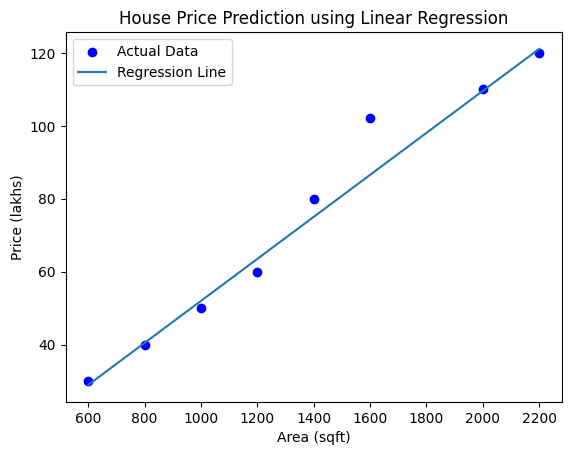

In [7]:
#step 10: visualization
plt.scatter(x,y,color="blue",label="Actual Data")
plt.plot(x,model.predict(x),label="Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (lakhs)")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.show()